In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from chatsky_llm_autoconfig.settings import EnvSettings

In [7]:
env_settings = EnvSettings()
env_settings.GENERATION_MODEL_NAME

'o1-mini'

In [4]:
from chatsky_llm_autoconfig.graph import Graph
from chatsky_llm_autoconfig.dialogue import Dialogue
import json

/home/olshevskaya/miniconda3/envs/conda_env_py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "BaseModel"
  warnings.warn(


In [5]:
from three_stages_1 import ThreeStagesGraphGenerator as Generator
from three_stages_1i import ThreeStagesGraphGenerator as GeneratorI
from three_stages_0i import ThreeStagesGraphGenerator as GeneratorI0
from append_chain import AppendChain

from chatsky_llm_autoconfig.metrics.automatic_metrics import is_same_structure, triplet_match, compare_graphs
graph_generator = Generator("o1-mini") # To generate 1st graph from one dialogue
graph_generator_llm_emb = GeneratorI() # To add dialogue to existing graph: adding nodes with LLM and edges with embedder
graph_generator_llm = GeneratorI0() # To add dialogue to existing graph with LLM
graph_generator_llm_2 = AppendChain() # To add (append) dialogue to existing graph with LLM (the second approach)

## functions

In [6]:
def validate_graph(graph):
    edges_match_nodes = graph.edges_match_nodes()

    new_graph = graph.remove_duplicated_nodes()
    if new_graph is None:
        check_duplicated_nodes = False
    else:
        if new_graph.graph_dict == graph.graph_dict:
            check_duplicated_nodes = True
        else:
            check_duplicated_nodes = False
    
    if edges_match_nodes and check_duplicated_nodes:
        return True
    else:
        return False

In [7]:
def validate_2_graphs(original_graph, result_graph):
    val_report = {}
    val_report['is_same_structure'] = is_same_structure(original_graph, result_graph)
    node_mapping, edge_mapping = triplet_match(original_graph, result_graph)
    val_report['triplet_match'] = {
        'node_mapping' : None,
        'edge_mapping' : None
        }
    val_report['triplet_match']['node_mapping'] = node_mapping
    val_report['triplet_match']['edge_mapping'] = edge_mapping
    
    return val_report

In [8]:
def get_start_data(dataset, graph_id):
    for data in dataset:
        if data['graph_id'] == graph_id:
            example = data
            break
    true_graph = Graph(graph_dict=example['graph'])
    validate_graph(true_graph)
    true_graph.visualise_short('true_graph')

    dialogues = example['dialogues']
    
    example['incremental'] = {}
    for i in range(len(dialogues)):
        example['incremental'].setdefault(f'graph_{i}')
    
    return example, true_graph, dialogues

In [9]:
path = '../data/generated_24_with_ids.json'
with open(path, 'r', encoding="utf-8") as f:
    generated_24 = json.load(f)

## o1-mini, ThreeStagesGenerator


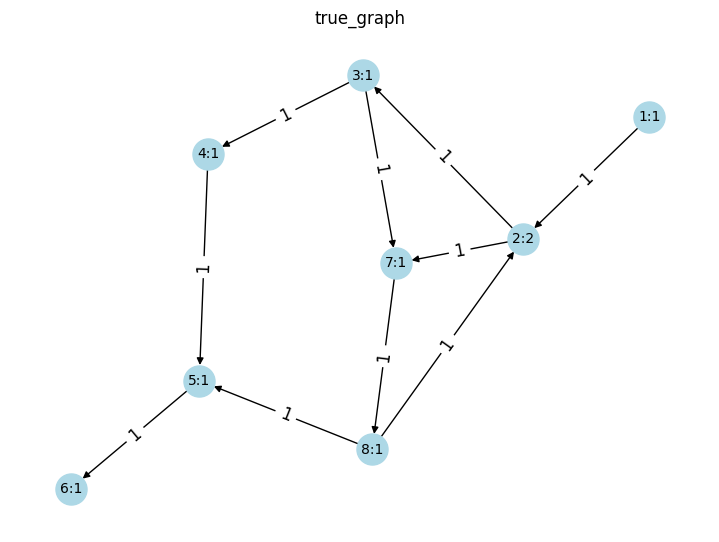

In [10]:
example, true_graph, dialogues = get_start_data(generated_24, 13)

In [11]:
true_graph.graph_dict

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["Yes, let's discuss the partnership process."]},
  {'source': 4,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thank you."]},
  {'source': 2,
   'target': 7,
   'utterances': ['Actually, can I change my inquiry?']},
  {'source': 7,
   'target': 8,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 8,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 8,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 3,
   'target': 7,
   'utterances': ['Actually, I want to change my question.']}],
 'nodes': [{'

Первый граф был сгенерирован раньше, так что его загружаем.

In [12]:
with open("../data/gen24_graphid13_inсremental_o1-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0']

#### **graph incrementation**

In [ ]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph = graph_generator_llm.invoke([new_dialogue], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Certa

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Certa

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


RES:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}, {'source': 5, 'target': 3, 'utterances': ['actually, i want to change my question.']}, {'source': 4, 'target': 6, 'utterances': ["i'd like to proceed with the application."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! 

In [ ]:
with open("gen24_graphid13_inсremental_o1-mini_TSG.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

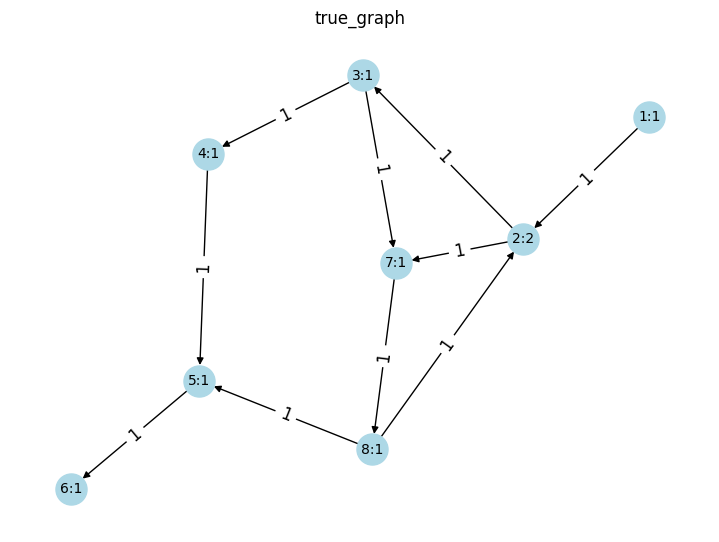

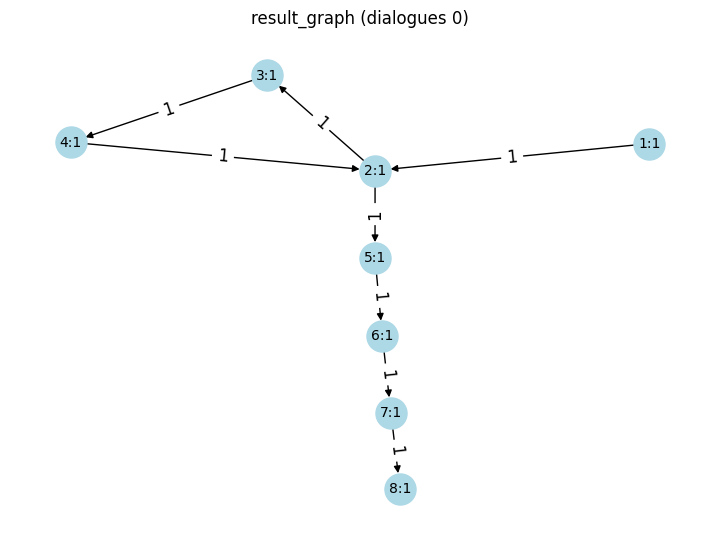

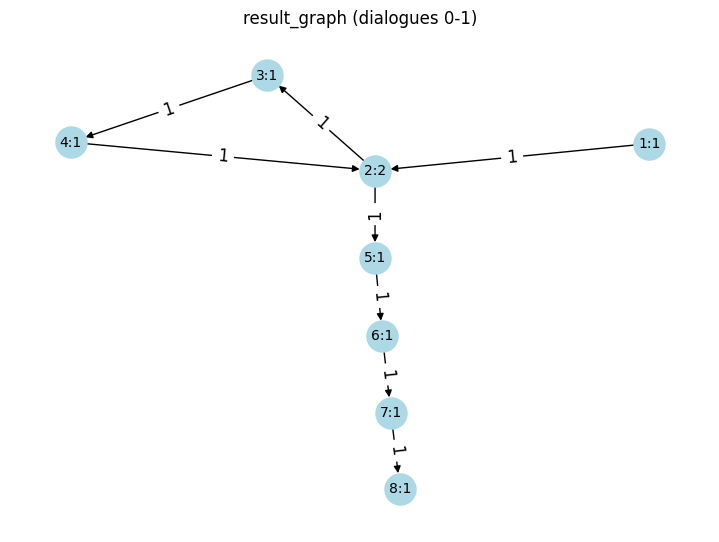

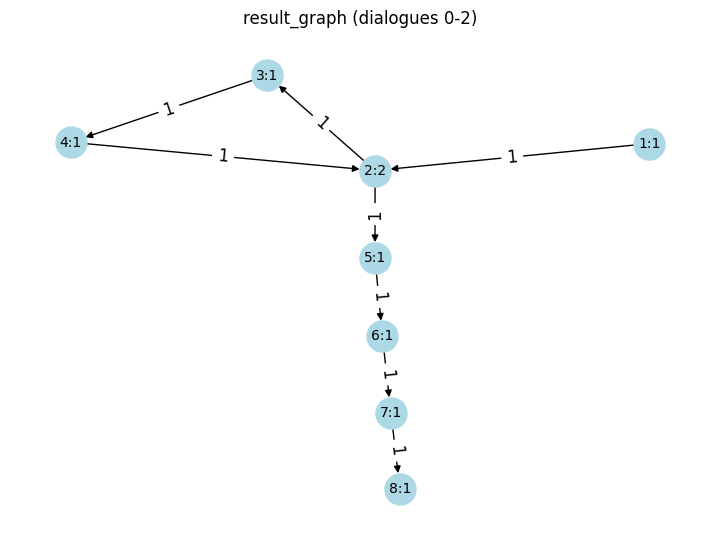

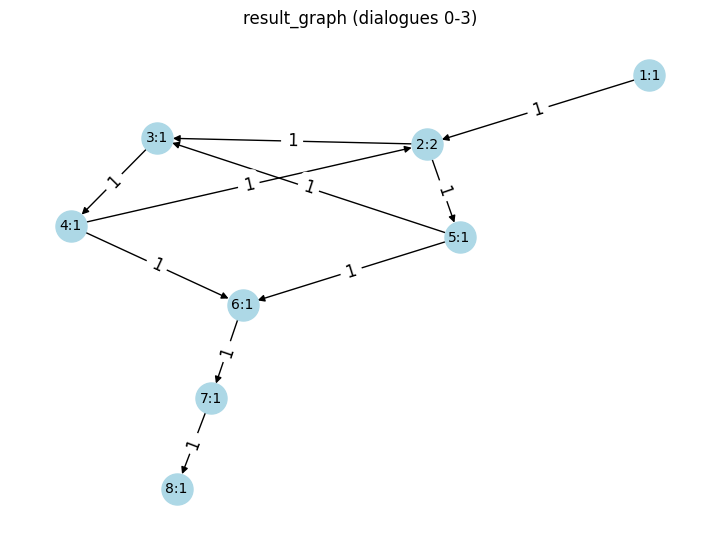

In [77]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

##### jsons, dialogues

In [79]:
true_graph.graph_dict

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["Yes, let's discuss the partnership process."]},
  {'source': 4,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thank you."]},
  {'source': 2,
   'target': 7,
   'utterances': ['Actually, can I change my inquiry?']},
  {'source': 7,
   'target': 8,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 8,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 8,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 3,
   'target': 7,
   'utterances': ['Actually, I want to change my question.']}],
 'nodes': [{'

In [14]:
example['incremental']['graph_0']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'is_start': True,
   'label': 'start',
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'is_start

In [15]:
example['incremental']['graph_1']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'is_start': True,
   'label': 'start',
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'is_start

In [16]:
example['incremental']['graph_2']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'is_start': True,
   'label': 'start',
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'is_start

In [17]:
example['incremental']['graph_3']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]},
  {'source': 5,
   'target': 3,
   'utterances': ['actually, i want to change my question.']},
  {'source': 4,
   'target': 6,
   'utterances': ["i'd like to proceed with the application."]}],
 'nodes': [{'

In [87]:
for i, dial in enumerate(example['dialogues']):
    print(f'DIALOGUE {i}')
    print(Dialogue.from_list(dial['messages']))
    print('---------------------')

DIALOGUE 0
assistant: Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?
user: I'd like to learn about your NFT policies.
assistant: Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?
user: Actually, can I change my inquiry?
assistant: Of course! How would you like to modify your inquiry?
user: I'd like to learn about the partnership benefits instead.
assistant: Certainly! Our partnerships offer various benefits including competitive compensation, exclusive access to our digital asset platforms, and opportunities for co-branded campaigns. We support our influencers with dedicated resources to maximize the impact of their content. Would you like more details or to proceed with an ap

Реплики assistant 1 и 4 одинаковые (node 2)

В диалогах 0 и 1 отличаются реплики assistant 4. Т.0. в диалоге 1 все реплики разные.

In [18]:
is_same_structure(true_graph, Graph(example['incremental']['graph_3']))

False

In [19]:
triplet_match(true_graph, Graph(example['incremental']['graph_3']))

TypeError: 'NoneType' object is not subscriptable

In [89]:
compare_graphs(true_graph, Graph(example['incremental']['graph_3']))

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


LEN1:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] LEN2:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

MAX:  [0, 1, 4, 5, 6, 7, 2, 3]
N_MAX:  [0, 1, 4, 5, 6, 7, 2, 3]
NODES:  0.9999999
ALL:  0.9760842


True

## o1-mini, ThreeStagesGenerator with embedder

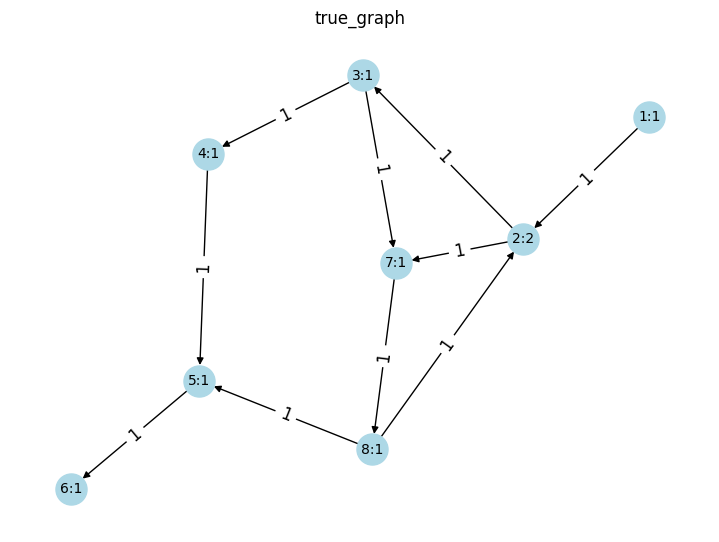

In [20]:
example, true_graph, dialogues = get_start_data(generated_24, 13)
with open("../data/gen24_graphid13_inсremental_o1-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0'] 

#### **graph incrementation**

o1-mini не подходит для этого метода?

In [103]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph, _ = graph_generator_llm_emb.invoke([new_dialogue], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"nodes": [{"id": 1, "is_start": true, "label": "start", "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {"id": 2, "is_start": false, "label": "nft_policies_response", "utterances": ["Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?"]}, {"id": 3, "is_start": false, "label": "modify_inquiry", "utterances": ["Of course! How would you like to modify your inquiry?"]}, {"id": 4, "is_start": false, "label": "partnership_benefits_response", "utterances": ["Certainly! Our partnerships offer various benefits including competitive compensation, exclusive access to our digital asset platforms, and opportunities for co-bran

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
/cephfs/home/olshevskaya/chatsky-llm-autoconfig/dev_packages/chatsky_llm_autoconfig/chatsky_llm_autoconfig/algorithms/three_stages_1i.py:78: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name=env_settings.EMBEDDER_MODEL, model_kwargs={"device": env_settings.EMBEDDER_DEVICE})
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like t

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


F:  [8]
FI:  [8, 1, 2, 3, 4]
ENDS:  [8, 1, 2, 3, 4]
FINIEHD
NODES:  [[1, 2, 3, 4, 2, 5, 6, 7, 8], [1, 2, 5, 6, 7, 8], [1, 2, 3, 4, 2], [1, 2, 3, 4], [1, 2, 3], [1, 2], [1]]
REM:  [[1, 2, 5, 6, 7, 8], [1, 2, 3, 4, 2]]
Graph has all the dialogues


RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Ce

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?']}, {'id': 3, 'label': 'modify_inquiry', 'is_start': False, 'utterances': ['Of course! How would you like t

RESULT:  {'edges': [{'source': 1, 'target': 2, 'utterances': ["i'd like to learn about your nft policies."]}, {'source': 2, 'target': 5, 'utterances': ['can you provide more details on content guidelines?']}, {'source': 2, 'target': 3, 'utterances': ['actually, can i change my inquiry?']}, {'source': 3, 'target': 4, 'utterances': ["i'd like to learn about the partnership benefits instead."]}, {'source': 4, 'target': 2, 'utterances': ['actually, i have another question about policies.']}, {'source': 5, 'target': 6, 'utterances': ["yes, let's discuss the partnership process."]}, {'source': 6, 'target': 7, 'utterances': ["i'd like to proceed with the application."]}, {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}], 'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']}, {'id': 2, 'label': 'nft_policies_response', 'is_start': False, 'utterances': ['Ce

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?", "actually, i want to change my question."]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?", "Actually, I want to change my question."]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {"id": 2, "label": "nft_policies_response", 

AttributeError: 'NoneType' object has no attribute 'model_dump'

In [104]:
with open("gen24_graphid13_incremental_o1-mini_TSG_emb.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [110]:
i = 3
result_graph = Graph(example['incremental']['graph_2'])
new_dialogue = Dialogue.from_list(dialogues[i]['messages'])

result_graph, _ = graph_generator_llm_emb.invoke([new_dialogue], result_graph)
print(f'validate_graph {i}:', validate_graph(result_graph))
example['incremental'][f'graph_{i}'] = result_graph.graph_dict

model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {"id": 2, "label": "nft_policies_response", 

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?"]}, {"id": 2, "label": "nft_policies_response", 

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Failed to parse DialogueNodes from completion {"edges": [{"source": 1, "target": 2, "utterances": ["i'd like to learn about your nft policies."]}, {"source": 2, "target": 5, "utterances": ["can you provide more details on content guidelines?"]}, {"source": 2, "target": 3, "utterances": ["actually, can i change my inquiry?"]}, {"source": 3, "target": 4, "utterances": ["i'd like to learn about the partnership benefits instead."]}, {"source": 4, "target": 2, "utterances": ["actually, i have another question about policies."]}, {"source": 4, "target": 6, "utterances": ["i'd like to proceed with the application."]}, {"source": 5, "target": 6, "utterances": ["yes, let's discuss the partnership process."]}, {"source": 6, "target": 7, "utterances": ["i'd like to proceed with the application."]}, {"source": 7, "target": 8, "utterances": ["no, that's all. thank you."]}], "nodes": [{"id": 1, "label": "start", "is_start": true, "utterances": ["Hello! Thank you for reaching out about an influencer 

AttributeError: 'NoneType' object has no attribute 'model_dump'

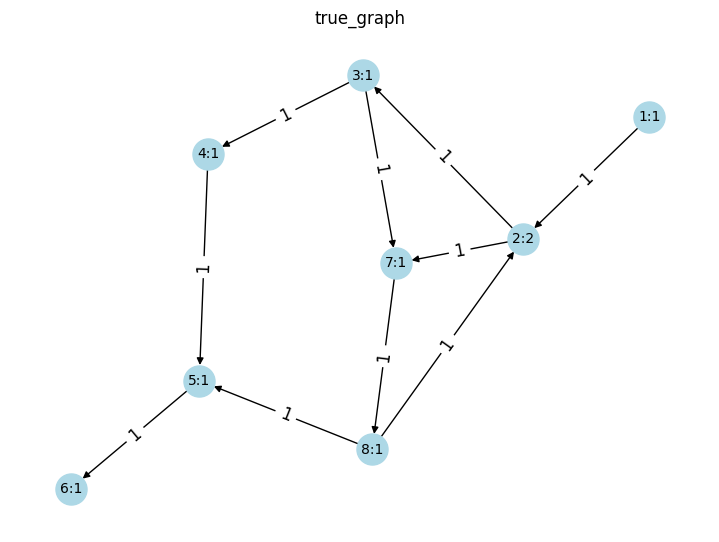

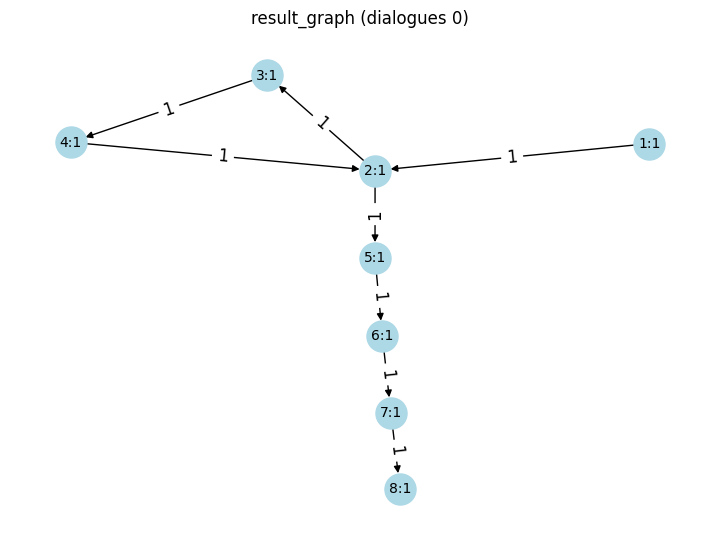

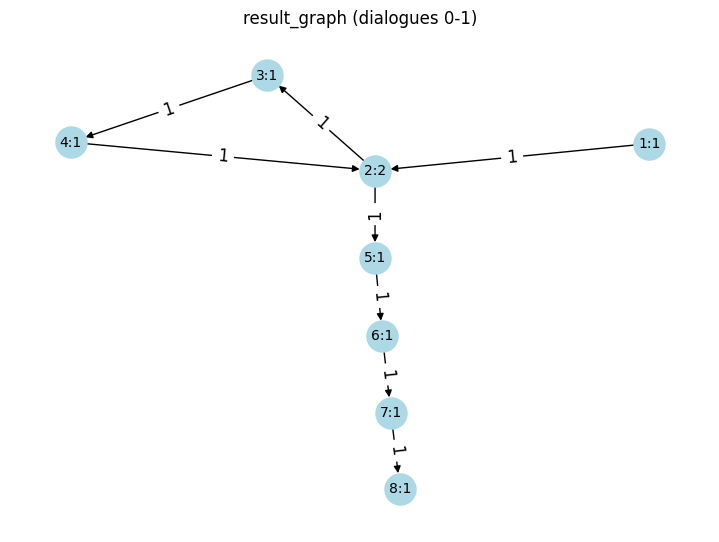

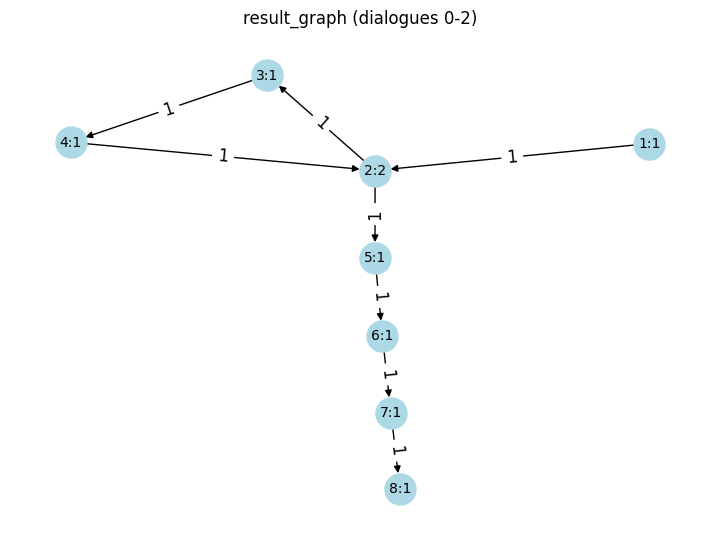

In [23]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        if result_graph:
            Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

##### jsons, dialogues

In [112]:
true_graph.graph_dict

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["Yes, let's discuss the partnership process."]},
  {'source': 4,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thank you."]},
  {'source': 2,
   'target': 7,
   'utterances': ['Actually, can I change my inquiry?']},
  {'source': 7,
   'target': 8,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 8,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 8,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 3,
   'target': 7,
   'utterances': ['Actually, I want to change my question.']}],
 'nodes': [{'

In [113]:
example['incremental']['graph_0']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'is_start': True,
   'label': 'start',
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'is_start

In [114]:
example['incremental']['graph_1']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'label': 

In [115]:
example['incremental']['graph_2']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'label': 

In [117]:
for i, dial in enumerate(example['dialogues']):
    print(f'DIALOGUE {i}')
    print(Dialogue.from_list(dial['messages']))
    print('---------------------')

DIALOGUE 0
assistant: Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?
user: I'd like to learn about your NFT policies.
assistant: Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?
user: Actually, can I change my inquiry?
assistant: Of course! How would you like to modify your inquiry?
user: I'd like to learn about the partnership benefits instead.
assistant: Certainly! Our partnerships offer various benefits including competitive compensation, exclusive access to our digital asset platforms, and opportunities for co-branded campaigns. We support our influencers with dedicated resources to maximize the impact of their content. Would you like more details or to proceed with an ap

## o1-mini, AppendChain

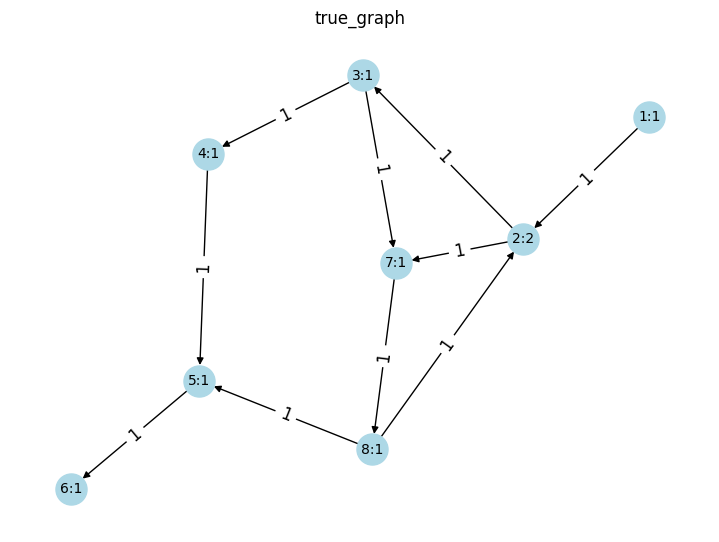

In [21]:
example, true_graph, dialogues = get_start_data(generated_24, 13)
with open("../data/gen24_graphid13_inсremental_o1-mini_TSG.json", 'r', encoding="utf-8") as f:
    _ = json.load(f)
example['incremental']['graph_0'] = _['incremental']['graph_0'] 

#### **graph incrementation**

In [21]:
for i in range(len(dialogues)):
    if i == 0:
        result_graph = Graph(example['incremental']['graph_0'])
    else:
        new_dialogue = Dialogue.from_list(dialogues[i]['messages'])
        try:
            result_graph = graph_generator_llm_2.invoke(dialogues[(i-1):(i+1)], result_graph)
            print(f'validate_graph {i}:', validate_graph(result_graph))
            example['incremental'][f'graph_{i}'] = result_graph.graph_dict
        except Exception as e:
            raise e

model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 1: True
model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 2: True
model:   o1-mini
LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


validate_graph 3: True


In [22]:
with open("gen24_graphid13_incremental_o1-mini_AppCh.json", "w", encoding="utf-8") as file:
    json.dump(example, file, indent=4, sort_keys=True)

In [18]:
with open("../data/gen24_graphid13_incremental_o1-mini_AppCh.json", 'r', encoding="utf-8") as f:
    example = json.load(f)

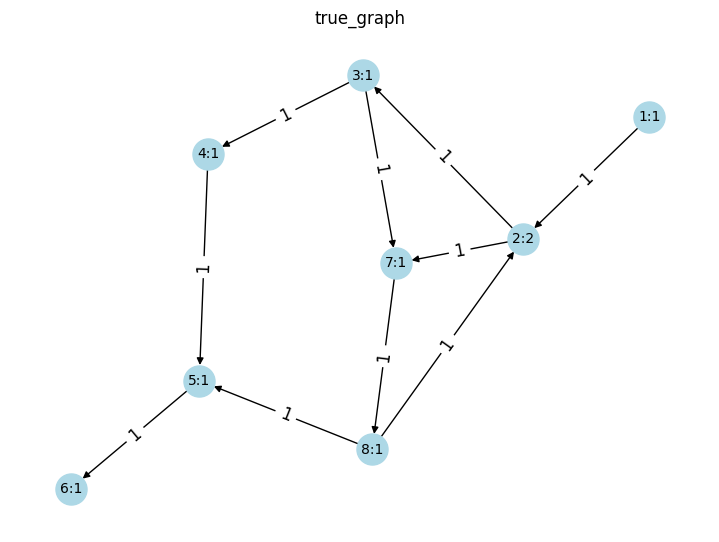

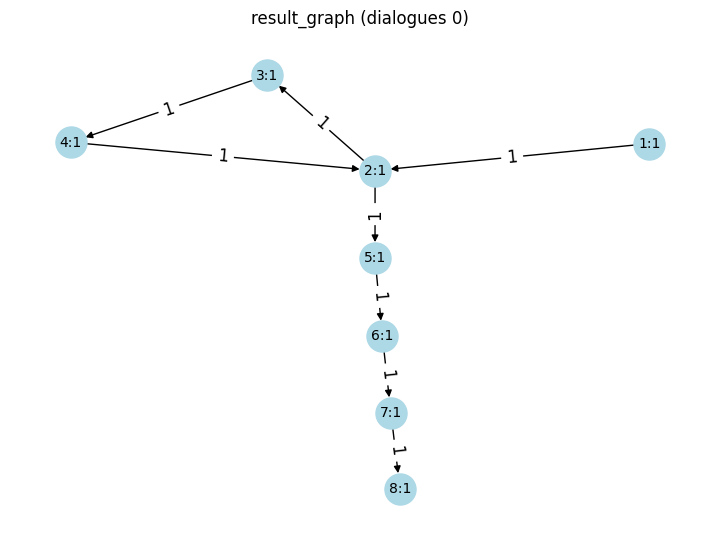

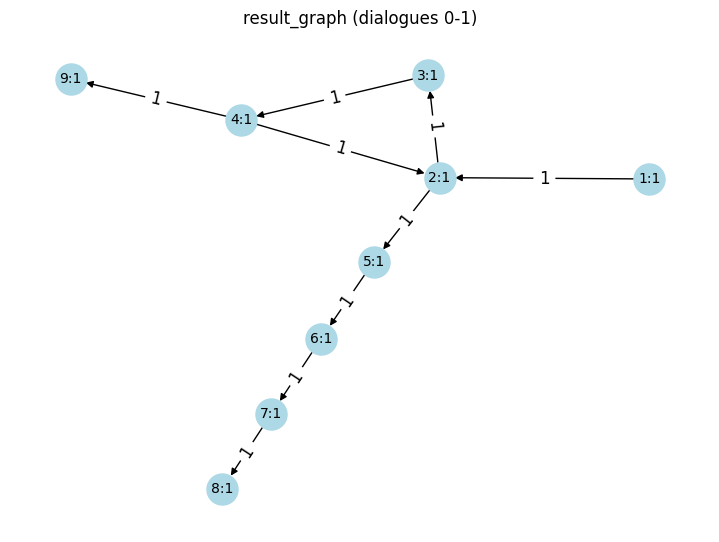

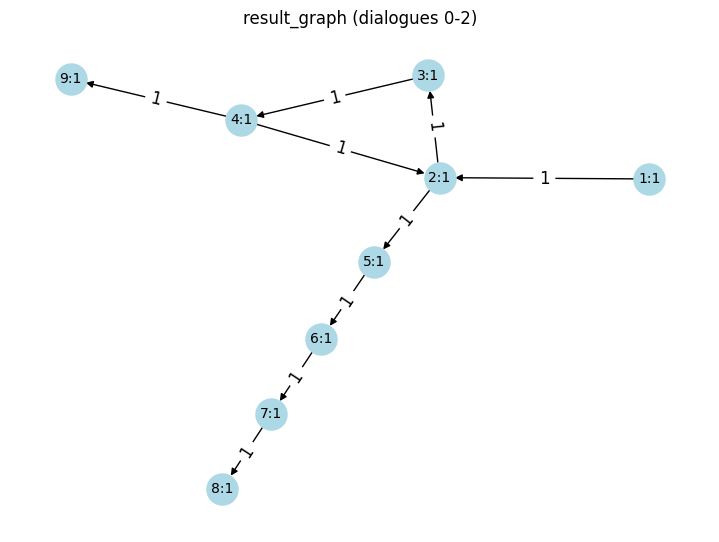

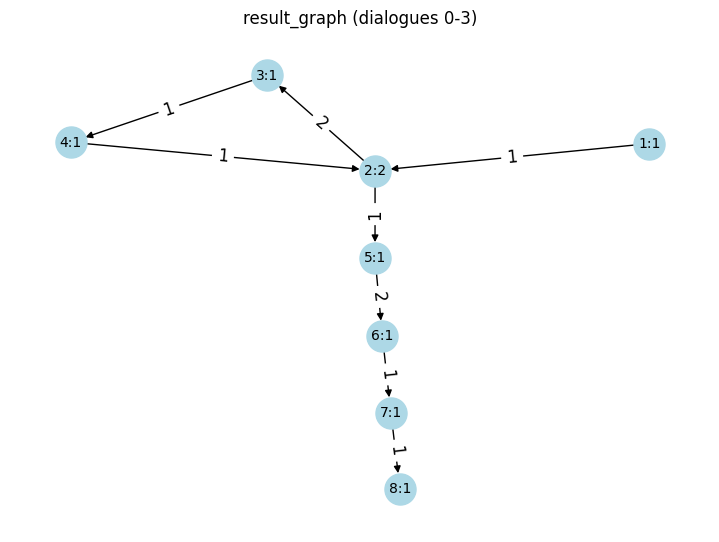

In [19]:
true_graph.visualise_short('true_graph')
for i, result_graph in enumerate(example['incremental'].values()):
    if i == 0:
        Graph(result_graph).visualise_short('result_graph (dialogues 0)')
    else:
        Graph(result_graph).visualise_short(f'result_graph (dialogues 0-{i})')

##### jsons, dialogues

In [24]:
true_graph.graph_dict

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["Yes, let's discuss the partnership process."]},
  {'source': 4,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 5, 'target': 6, 'utterances': ["No, that's all. Thank you."]},
  {'source': 2,
   'target': 7,
   'utterances': ['Actually, can I change my inquiry?']},
  {'source': 7,
   'target': 8,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 8,
   'target': 5,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 8,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 3,
   'target': 7,
   'utterances': ['Actually, I want to change my question.']}],
 'nodes': [{'

In [25]:
example['incremental']['graph_0']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'is_start': True,
   'label': 'start',
   'utterances': ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?']},
  {'id': 2,
   'is_start

In [26]:
example['incremental']['graph_1']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 4,
   'target': 9,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! Thank you f

In [27]:
example['incremental']['graph_2']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["i'd like to learn about your nft policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['actually, can i change my inquiry?']},
  {'source': 2,
   'target': 5,
   'utterances': ['can you provide more details on content guidelines?']},
  {'source': 3,
   'target': 4,
   'utterances': ["i'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 4,
   'target': 9,
   'utterances': ['actually, i have another question about policies.']},
  {'source': 5,
   'target': 6,
   'utterances': ["yes, let's discuss the partnership process."]},
  {'source': 6,
   'target': 7,
   'utterances': ["i'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["no, that's all. thank you."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hello! Thank you f

In [28]:
example['incremental']['graph_3']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'd like to learn about your NFT policies."]},
  {'source': 2,
   'target': 3,
   'utterances': ['Actually, can I change my inquiry?',
    'Actually, I want to change my question.']},
  {'source': 3,
   'target': 4,
   'utterances': ["I'd like to learn about the partnership benefits instead."]},
  {'source': 4,
   'target': 2,
   'utterances': ['Actually, I have another question about policies.']},
  {'source': 2,
   'target': 5,
   'utterances': ['Can you provide more details on content guidelines?']},
  {'source': 5,
   'target': 6,
   'utterances': ['Would you like to discuss the partnership process next?',
    'Would you like to discuss the partnership process next?']},
  {'source': 6,
   'target': 7,
   'utterances': ["I'd like to proceed with the application."]},
  {'source': 7, 'target': 8, 'utterances': ["No, that's all. Thank you."]}],
 'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['H

In [29]:
for i, dial in enumerate(example['dialogues']):
    print(f'DIALOGUE {i}')
    print(Dialogue.from_list(dial['messages']))
    print('---------------------')

DIALOGUE 0
assistant: Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?
user: I'd like to learn about your NFT policies.
assistant: Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?
user: Actually, can I change my inquiry?
assistant: Of course! How would you like to modify your inquiry?
user: I'd like to learn about the partnership benefits instead.
assistant: Certainly! Our partnerships offer various benefits including competitive compensation, exclusive access to our digital asset platforms, and opportunities for co-branded campaigns. We support our influencers with dedicated resources to maximize the impact of their content. Would you like more details or to proceed with an ap

In [31]:
compare_graphs(true_graph, Graph(example['incremental']['graph_3']))

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


LEN1:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] LEN2:  [1, 2, 1, 1, 1, 2, 1, 1]


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

MAX:  [0, 1, 4, 5, 6, 7, 2, 3]
N_MAX:  [0, 1, 4, 5, 6, 7, 2, 3]
LENS


False

In [30]:
validate_2_graphs(true_graph, Graph(example['incremental']['graph_3']))

{1: ['Hello! Thank you for reaching out about an influencer partnership. How can I assist you today?'], 2: ['Certainly! Our approach to NFTs and digital assets is based on transparency and ethical collaborations. We ask influencers to clearly disclose any promotions related to digital assets and follow specific guidelines for creating and distributing content. Do you have any particular questions regarding these policies?', 'Of course! Our NFT and digital asset policies ensure that all collaborations are transparent and ethical. We require influencers to clearly disclose any digital asset promotions and adhere to specific guidelines regarding content creation and distribution. Do you have any specific questions about these policies?'], 3: ['Certainly! For content creation, we require that any digital asset promotions clearly state the nature of the asset, its authenticity, and any associated benefits or risks. Additionally, all distribution channels must comply with relevant regulation

{'is_same_structure': False,
 'triplet_match': {'node_mapping': {1: None,
   2: None,
   3: None,
   4: None,
   5: None,
   6: None,
   7: None,
   8: None},
  'edge_mapping': {'1->2': None,
   '2->3': None,
   '2->7': None,
   '3->4': None,
   '3->7': None,
   '4->5': None,
   '5->6': None,
   '7->8': None,
   '8->5': None,
   '8->2': None}}}

## Вывод

Все три метода проверены на одном примере из синтетического датасета (граф 13). Для генерации использована модель o1-mini.
1. Метод ThreeStagesGenerator - работает, но не идеально (triplet_match возвращает ошибку, is_same_structure=False, но метрика compare_graphs возвращает NODES: 0.9999999, ALL: 0.9760842)
2. Метод ThreeStagesGenerator с эмбеддером - не работает (не генерирует последний граф, общий для всех диаологов)
3. Метод AppendChain - работает плохо (и визуально, и по метрикам)